In [57]:
import matplotlib.pyplot as plt
import cv2 
import numpy as np
%matplotlib inline

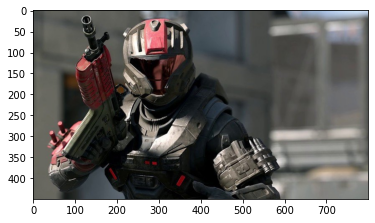

In [58]:
img = cv2.imread('b.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [59]:
from random import randrange, getrandbits

def power(a,d,n):
    ans=1
    while d!=0:
        if d%2==1:
            ans=((ans%n)*(a%n))%n
        a=((a%n)*(a%n))%n
        d>>=1
    return ans


def MillerRabin(N,d):
    a = randrange(2, N - 1)
    x=power(a,d,N);
    if x==1 or x==N-1:
        return True
    else:
        while(d!=N-1):
            x=((x%N)*(x%N))%N
            if x==1:
                return False
            if x==N-1:
                return True
            d<<=1
        return False


def is_prime(N,K):
    if N==3 or N==2:
        return True
    if N<=1 or N%2==0:
        return False
    d=N-1
    while d%2!=0:
        d/=2
    for _ in range(K):
        if not MillerRabin(N,d):
            return False
    return True;  
  



def generate_prime_candidate(length):
    p = getrandbits(length)
    # apply a mask to set MSB and LSB to 1
    # Set MSB to 1 to make sure we have a Number of 1024 bits.
    # Set LSB to 1 to make sure we get a Odd Number.
    p |= (1 << length - 1) | 1
    return p



def generatePrimeNumber(length):
    A=4
    while not is_prime(A, 128):
        A = generate_prime_candidate(length)
    return A



length=5
P=generatePrimeNumber(length)
Q=generatePrimeNumber(length)

print(P)
print(Q)

17
29


In [60]:
N=P*Q
eulerTotient=(P-1)*(Q-1)
print(N)
print(eulerTotient)

493
448


In [61]:
def GCD(a,b):
    if a==0:
        return b
    return GCD(b%a,a)

E=generatePrimeNumber(4)
while GCD(E,eulerTotient)!=1:
    E=generatePrimeNumber(4)
print(E)

13


In [62]:
def gcdExtended(E,eulerTotient):
    a1,a2,b1,b2,d1,d2=1,0,0,1,eulerTotient,E
    
    while d2!=1:
        k=(d1//d2)
        
        temp=a2
        a2=a1-(a2*k)
        a1=temp
        
        temp=b2
        b2=b1-(b2*k)
        b1=temp
        
        temp=d2
        d2=d1-(d2*k)
        d1=temp
        
        D=b2
        
    if D>eulerTotient:
        D=D%eulerTotient
    elif D<0:
        D=D+eulerTotient
    return D

D=gcdExtended(E,eulerTotient)
print(D)

69


In [63]:
row,col=img.shape[0],img.shape[1]
enc = [[0 for x in range(3000)] for y in range(3000)]

In [64]:
row,col

(450, 800)

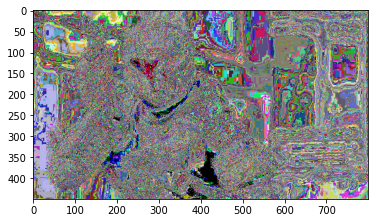

In [65]:
for i in range(0,450):
    for j in range(0,800):
        r,g,b=img[i,j]
        C1=power(r,E,N)
        C2=power(g,E,N)
        C3=power(b,E,N)
        enc[i][j]=[C1,C2,C3]
        C1=C1%256
        C2=C2%256
        C3=C3%256
        img[i,j]=[C1,C2,C3]

plt.imshow(img)

In [66]:
for i in range(0,450):
    for j in range(0,800):
        r,g,b=enc[i][j]
        M1=power(r,D,N)
        M2=power(g,D,N)
        M3=power(b,D,N)
        img[i,j]=[M1,M2,M3]

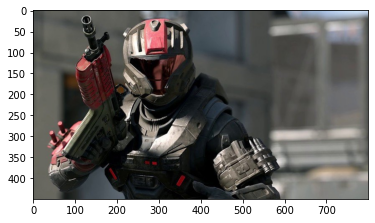

In [67]:
plt.imshow(img)